In [2]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('../../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/params_testing/')
from model_files.nerm_pvals import model 
import pandas as pdc
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
import seaborn as sns
from scipy.optimize import curve_fit

In [4]:
ttdm2wt = np.load('mode2_allpars_wtpmlkl_ttds.npy')
ttdm2a20kd = np.load('mode2_allpars_a20kd_ttds.npy')
ttdm2a20oe = np.load('mode2_allpars_a20oe_ttds.npy')
ttdm2cyldkd = np.load('mode2_allpars_cyldkd_ttds.npy')
ttdm2cyldoe = np.load('mode2_allpars_cyldoe_ttds.npy')
ttdm2lubkd = np.load('mode2_allpars_lubackd_ttds.npy')
ttdm2luboe2 = np.load('mode2_allpars_lubacoe_ttds.npy')

In [5]:
ttdm2wt2 = [ttdm2wt / 60 for ttdm2wt in ttdm2wt]
ttdm2a20kd2 = [ttdm2a20kd / 60 for ttdm2a20kd in ttdm2a20kd]
ttdm2a20oe2 = [ttdm2a20oe / 60 for ttdm2a20oe in ttdm2a20oe]
ttdm2cyldkd2 = [ttdm2cyldkd / 60 for ttdm2cyldkd in ttdm2cyldkd]
ttdm2cyldoe2 = [ttdm2cyldoe / 60 for ttdm2cyldoe in ttdm2cyldoe]
ttdm2lubkd2 = [ttdm2lubkd / 60 for ttdm2lubkd in ttdm2lubkd]
ttdm2luboe22 = [ttdm2luboe2/60 for ttdm2luboe2 in ttdm2luboe2]

In [6]:
# dfm232 = pd.melt(dfmode3)
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df2 = pd.DataFrame({'WT': ttdm2wt2, 
                         'A20 KD': ttdm2a20kd2,
                          'A20 OE': ttdm2a20oe2,
                        'CYLD KD': ttdm2cyldkd2,
                          'CYLD OE': ttdm2cyldoe2,
                        'LUBAC KD': ttdm2lubkd2,
                         'LUBAC OE': ttdm2luboe22})
dfclus0n2 = pd.DataFrame(data = mode1df2,
                        columns = ['WT', 'A20 KD', 'A20 OE','CYLD KD', 'CYLD OE', 'LUBAC KD', 'LUBAC OE'])
dfclus1n2 = pd.melt(dfclus0n2)

No handles with labels found to put in legend.


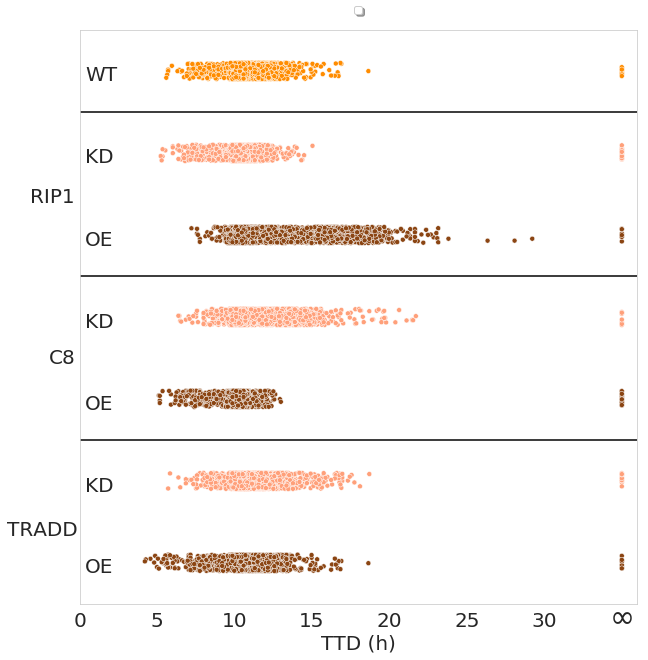

In [20]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,9))
my_pal = {"WT": "darkorange",
          "A20 KD":"lightsalmon", "A20 OE":"saddlebrown",
          "CYLD KD": "lightsalmon", "CYLD OE":"saddlebrown",
          "LUBAC KD": "lightsalmon", "LUBAC OE":"saddlebrown"}
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus0n2), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor="white")
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('CYLD', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('LUBAC', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 30)
plt.annotate('RIP1', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
plt.annotate('C8', xy = (-0.055,.42), xycoords ='axes fraction', fontsize = 20)
plt.annotate('TRADD', xy = (-0.13,.12), xycoords ='axes fraction', fontsize = 20)

plt.annotate('WT', xy = (0.01,.912), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('KD', xy = (0.01,.77), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.625), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.483), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.34), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.197), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.055), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', ''])
plt.annotate(r'$\infty$', xy = (0.95,-0.035), xycoords ='axes fraction', fontsize = 30)

# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
b.set_xlabel("TTD (h)",fontsize = 20)
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode2_initsens_100tnf_stripdots_hrs_nameinside.pdf')

In [12]:
dfmode2hr = pd.read_csv("mode2_allparamsensdf_ttds.csv", index_col=0)

No handles with labels found to put in legend.


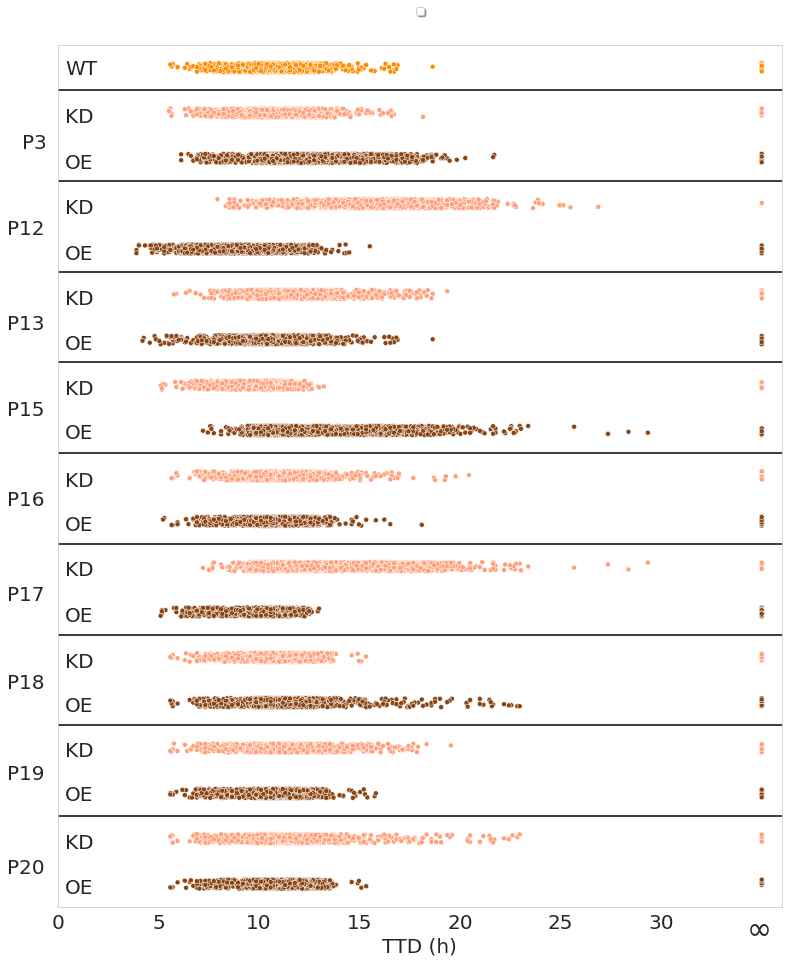

In [18]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (11,13))
my_pal = {"WT": "darkorange",
          'P3 KD': "lightsalmon",'P3 OE':"saddlebrown",
          'P12 KD': "lightsalmon",'P12 OE':"saddlebrown",
          'P13 KD': "lightsalmon",'P13 OE':"saddlebrown",
          'P15 KD': "lightsalmon",'P15 OE':"saddlebrown", 
          'P16 KD': "lightsalmon",'P16 OE':"saddlebrown",
          'P17 KD': "lightsalmon",'P17 OE':"saddlebrown",
          'P18 KD': "lightsalmon",'P18 OE':"saddlebrown",
          'P19 KD': "lightsalmon",'P19 OE':"saddlebrown",
          'P20 KD': "lightsalmon",'P20 OE':"saddlebrown"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfmode2hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)


plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
plt.axhline(y=14.5, color = 'k')
plt.axhline(y=16.5, color = 'k')
plt.annotate('WT', xy = (0.01,.965), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('KD', xy = (0.01,.91), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.857), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.804), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.751), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.699), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.647), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.594), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.543), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.488), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.437), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.384), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.331), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.278), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.227), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

plt.annotate('KD', xy = (0.01,.174), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.123), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.068), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.015), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.axhline(y=18.5, color = 'k')
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', '',
                                             '', '', '','', '','', '',
                                             '', '', '',''])
plt.annotate('P3', xy = (-0.05,.88), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('P12', xy = (-0.07,.78), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P13', xy = (-0.07,.67), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P15', xy = (-0.07,.57), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P16', xy = (-0.07,.465), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P17', xy = (-0.07,.355), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P18', xy = (-0.07,.253), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P19', xy = (-0.07,.148), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P20', xy = (-0.07,.039), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate(r'$\infty$', xy = (0.95,-0.035), xycoords ='axes fraction', fontsize = 30)
b.set_xlabel("TTD (h)",fontsize = 20)
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.savefig('pmlkl_mode2_paramsens_100tnf_stripdots_hrs_kdoeinside_edgewhite_fontsize.pdf')

In [15]:
print(ttdm2wt2.count(35))
print(ttdm2a20kd2.count(35))
print(ttdm2a20oe2.count(35))
print(ttdm2cyldkd2.count(235))
print(ttdm2cyldoe2.count(35))
print(ttdm2lubkd2.count(35))
print(ttdm2luboe22.count(35))

12
23
8
0
18
12
10
